In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
import sys
import sounddevice as sd
import soundfile as sf
from pydub import AudioSegment
fs = 44100
onelen = 2
note = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [130, 138, 147, 155, 164, 174, 185,196, 207, 220, 233, 246],
    [263, 277, 293, 311, 329, 349, 369, 392, 415, 440, 466, 493, 0],
    [523, 554, 587, 622, 659, 698, 739, 784, 830, 880, 932, 987, 0]
]
names = {
    'c': 0,
    'c#': 1,
    'd': 2,
    'd#': 3,
    'e': 4,
    'f': 5,
    'f#': 6,
    'g': 7,
    'g#': 8,
    'a': 9,
    'b': 10,
    'h': 11,
    '-': 12
}

In [11]:
song = [
    [0, '-'], [0, '-'], [0, '-'], [0, '-'], [1, 'g'],
    [2, 'e'], [0, '-'], [3, 'd'], [2, 'g'], [0, '-'], [1, 'g'],
    [2, 'e'], [3, 'd'], [2, 'g'], [3, 'c'], [2, 'h'], [2, 'e'], [2, 'g'], [2, 'h'],
    [2, 'b'], [2, 'h'], [2, 'a'], [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], 
    [0, '-'], [0, '-'], [1, 'g'], [2, 'e'], [0, '-'], [3, 'd'], [2, 'g'], [0, '-'], 
    [1, 'g'], [2, 'e'], [3, 'd'], [2, 'g'], [3, 'c'], [2, 'h'], [2, 'g'], [2, 'h'], [3, 'e'], [2, 'f'],
    [0, '-']
]

start = [
    0, 0.25, 0.5, 0.75, 0.875, 
    1, 1.25, 1.375, 1.5, 1.75, 1.875, 
    2, 2.125, 2.25, 2.375, 2.5, 2.625, 2.75, 2.875, 
    3, 3.5, 3.5832, 3.6664, 3.7496, 3.8328, 3.9160, 3.9992, 
    4.5, 4.75, 4.875, 5, 5.25, 5.325, 5.5, 5.75, 
    5.825, 6, 6.125, 6.25, 6.375, 6.5, 6.625, 6.75, 6.875, 7,
    8
]

durations = [
    0.25, 0.25, 0.25, 0.125, 0.125,
    0.25, 0.125, 0.125, 0.25, 0.125, 0.125,
    0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125,
    0.5, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.5, 
    0.25, 0.125, 0.125, 0.25, 0.125, 0.125, 0.25, 0.125,
    0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 1,
    0.1
]


In [12]:
data = np.ndarray(int(fs * start[len(start) - 1] * onelen * 2))
cnt = np.ndarray(int(fs * start[len(start) - 1] * onelen * 2))
print(len(data))

1411200


In [13]:
def play(start, rate, dur):
    SZ = int(fs * dur)
    while (rate * SZ) % fs != 0:
        SZ += 1
    volume = 1
    for i in range(0, SZ):
        data[start + i] += volume * math.sin(2 * math.pi * i * rate / fs)
        cnt[start + i] += 1
        volume -= 1 / SZ

In [14]:
for i in range(0, len(song) - 1):
    play(int(start[i] * onelen * fs), note[song[i][0]][names[song[i][1]]], durations[i] * onelen)
_max = -100
for _ in data:
    _max = max(_max, _)
for i in range(0, len(data)):
    data[i] /= _max
    #data[i] = min(data[i], 1)
    #data[i] = max(data[i], -1)

In [15]:
sd.play(data, fs)
sf.write(data = data, file='pink_panther.wav', samplerate=fs)
AudioSegment.from_wav('pink_panther.wav').export('pink_panther.mp3', format='mp3')

<_io.BufferedRandom name='pink_panther.mp3'>

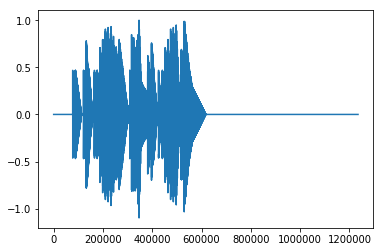

In [7]:
fig = plt.figure()
plt.plot(data)
plt.show()

fig.savefig('output.png')

In [10]:
#data = np.append(data, data)
sd.play(data, fs)
sd.wait()